In [4]:
import pandas as pd
%pylab inline 
%matplotlib inline
import matplotlib.pyplot as plt

from math import sqrt
from math import ceil
from math import log
import numpy as np
from numpy.random import multivariate_normal, randn, uniform
from scipy.linalg import norm
from scipy.linalg import qr

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 

Populating the interactive namespace from numpy and matplotlib


In [5]:
#Link where you can find the Data Set :
#https://archive.ics.uci.edu/ml/machine-learning-databases/00342/

In [6]:
#Data Set :
df=pd.read_excel (r'Data_Cortex_Nuclear.xls') 
print("shape of the data set =",df.shape) #1080 rows and 82 columns ~88 000 elements
df

shape of the data set = (1080, 82)


,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [7]:
#Exploration of the Data Set :
print(df.columns) #covariables
print(df.info)

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')
<bound met

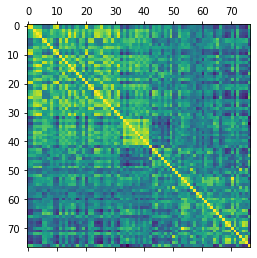

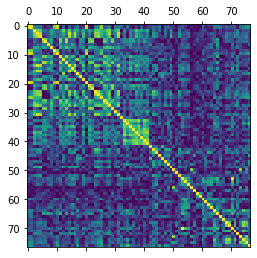

           DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
DYRK1A_N   1.000000  0.959512  0.359433  0.294526  0.325063 -0.180959   
ITSN1_N    0.959512  1.000000  0.459884  0.422492  0.426182 -0.147775   
BDNF_N     0.359433  0.459884  1.000000  0.805784  0.749993  0.317537   
NR1_N      0.294526  0.422492  0.805784  1.000000  0.873889  0.211540   
NR2A_N     0.325063  0.426182  0.749993  0.873889  1.000000  0.110172   
...             ...       ...       ...       ...       ...       ...   
SYP_N     -0.047246  0.042422  0.450433  0.473366  0.400526  0.248531   
H3AcK18_N -0.384816 -0.347339 -0.135637 -0.234171 -0.314210  0.338456   
EGR1_N    -0.323397 -0.399856 -0.239907 -0.319672 -0.346987  0.280476   
H3MeK4_N  -0.473734 -0.511433 -0.244732 -0.351958 -0.454366  0.383404   
CaNA_N     0.476033  0.517782  0.262578  0.205463  0.187292 -0.238567   

            pBRAF_N  pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N  \
DYRK1A_N  -0.093737  -0.180169  0.047299  0.

In [8]:
#Covariance matrix to find some correlations between the features :
cov=df.corr()
covabs=abs(cov)
plt.matshow(cov)
plt.matshow(covabs)
plt.show()
print(cov)

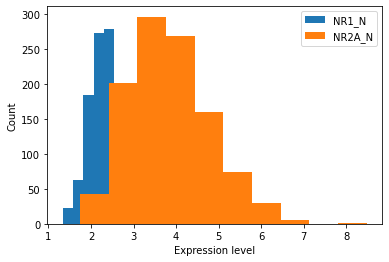

In [9]:
#Histogram of two correlated proteins :
plt.hist(df.NR1_N,label="NR1_N")
plt.hist(df.NR2A_N,label="NR2A_N")
plt.xlabel("Expression level")
plt.ylabel("Count")
plt.legend()

In [10]:
#Preparation of the data :
#we transform "Genotype" and "Treatment" to have quantitative values
df=df.fillna(0.4)
df.loc[df.Genotype=='Control','Genotype']=-1
df.loc[df.Genotype=='Ts65Dn','Genotype']=1
df.loc[df.Treatment=='Memantine','Treatment']=-1
df.loc[df.Treatment=='Saline','Treatment']=1
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,-1,-1,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,-1,-1,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,-1,-1,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,-1,-1,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,-1,-1,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,1,1,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,1,1,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,1,1,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,1,1,S/C,t-SC-s


In [11]:
#Creation of the input X and of the ouput Y :
Y=df.iloc [:, -4] #the variable we want to predict is Genotype
X=df.loc[:, df.columns != 'Genotype'] #we remove the target variable to obtain X
#we want to classifie using only the proteins to see if they are sufficient informations
X=X.loc[:,X.columns != 'Behavior']
X=X.loc[:,X.columns != 'Treatment']
X=X.loc[:,X.columns != 'class']
X=X.loc[:,X.columns != 'MouseID']

-1    570
 1    510
Name: Genotype, dtype: int64


<AxesSubplot:>

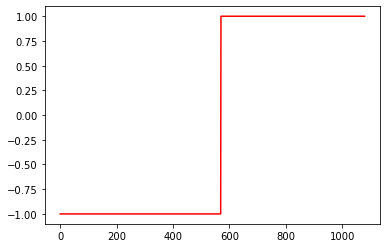

In [12]:
#Repartition of the genotypes :
print(df["Genotype"].value_counts())
df["Genotype"].plot(color='red')

[]

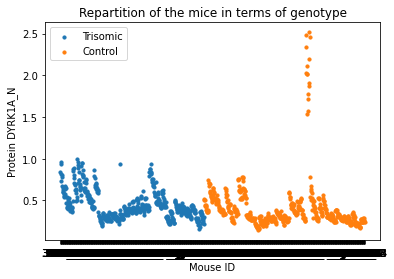

In [13]:
#Visualization of the samples' repartition in terms of genotype :
trisomic=df.loc[Y==1] 
control=df.loc[Y==-1]
plt.scatter(trisomic.iloc[:, 0], trisomic.iloc[:, 1], s=10, label='Trisomic')
plt.scatter(control.iloc[:, 0], control.iloc[:, 1], s=10, label='Control')
plt.legend()
plt.xlabel("Mouse ID")
plt.ylabel("Protein DYRK1A_N")
plt.title("Repartition of the mice in terms of genotype")
plot()

In [16]:
#Transformation of the data to have arrays :
Xnew=np.c_[np.ones((X.shape[0], 1)), X] #design matrix
Ynew=Y[:, np.newaxis] #output vector
Ynew=Ynew.astype('int')
theta=np.zeros((X.shape[1]+1,1))
print("n =",X.shape[0],"d =",X.shape[1]+1) #dimension +1 (intercept)

n = 1080 d = 78


<ipython-input-16-493d7ee6f64b>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Ynew=Y[:, np.newaxis] #output vector


In [17]:
#Y takes two values (-1 or 1) : logistic regression
#we first use sklearn so we can compare these results to our future results
model=LogisticRegression()
model.fit(Xnew, Ynew)
Ytrain=model.predict(Xnew)
parameters=model.coef_

#the algorithm doesn't converge : the data aren't scaled so it takes longer to converge

C:\Users\manon\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\manon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
#We standardize the data (mean=0, variance=1) so the algorithm converges faster :
from sklearn import preprocessing
import numpy as np
scaler=preprocessing.StandardScaler().fit(Xnew)
Xbis=scaler.transform(Xnew)

In [23]:
#Logistic regression :
model=LogisticRegression()
m=model.fit(Xbis, Ynew)
Ytrain=m.predict(Xbis)
parameters=model.coef_

print(Ytrain)
print("accuracy of the model =",accuracy_score(Ynew, Ytrain))

[-1 -1 -1 ...  1  1  1]
accuracy of the model = 0.9805555555555555


C:\Users\manon\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [24]:
#Regularization :
#penalisation l2 
ridge=LogisticRegression(penalty='l2', solver='liblinear')
mod=ridge.fit(Xbis,Ynew)
Yridge=mod.predict(Xbis)
paramridge=ridge.coef_
print(Yridge)
print(paramridge)

#penalisation l1
lasso=LogisticRegression(penalty='l1', solver='liblinear')
modbis=lasso.fit(Xbis,Ynew)
Ylasso=modbis.predict(Xbis)
paramlasso=lasso.coef_
print(Ylasso)
print(paramlasso) #sparse regularization : coefficient = 0 if the covariable isn't selected

[-1 -1 -1 ...  1  1  1]
[[ 0.          0.72828946  2.50187849  0.23084375 -1.26399121 -0.47177803
   1.01011038  0.30478064 -0.7973437   0.51160268 -0.76164636 -0.51866257
   0.12076686  0.93106268  0.15572483 -1.27795027 -0.21705258  0.87663968
  -0.83760985 -1.26858058  0.53361131 -1.43711415 -0.85620668 -0.67558714
  -1.20591383 -3.22479232 -0.4250132   0.40403458  0.41097325  1.72462975
  -0.37071742  2.94322015  1.86667765  0.68288531 -1.31836963 -0.09891909
  -0.38324365  1.18787184 -1.27147458 -0.67860104 -0.42799376 -0.63501959
   1.91140862  0.49491106  0.87604403  0.00694431 -0.03707699 -0.47721234
   0.09170405  0.1074603   0.05442052 -0.0379226  -0.52519249  0.30395391
  -0.35355027  0.79188909 -0.23430667  0.73105789  0.07095733 -0.76302983
   0.30788791 -0.74116554  0.65485008  0.16072326  0.14146138  0.66441667
   1.01973203 -0.03482386 -0.87980217  0.1239578  -0.66775369 -0.35355027
   0.15776782 -1.12896515  0.00854085 -0.15271176 -0.93920716  0.65190483]]
[-1 -1 -1 ..

C:\Users\manon\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\manon\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [25]:
#Training and Testing sets :
p=0.2
n=len(Y)
Itrain=int(n*(1-p))
Xtrain=Xbis[:Itrain,]
Xtest=Xbis[Itrain:,]
Ytrain=Ynew[:Itrain]
Ytest=Ynew[Itrain:]

ridgetrain= LogisticRegression(penalty='l2',C=0.01,solver='liblinear')
modtrain=ridgetrain.fit(Xtrain,Ytrain)
Yprediction=modtrain.predict(Xtest)
errRidge=mean((Ytest!=Yprediction)) 
print("error Ridge =",errRidge)

lassotrain= LogisticRegression(penalty='l1',C=0.04,solver='liblinear')
mod2train=lassotrain.fit(Xtrain,Ytrain)
Yprediction2=mod2train.predict(Xtest)
errLasso=mean((Ytest!=Yprediction2)) 
print("error Lasso =",errLasso)

error Ridge = 0.09722222222222222
error Lasso = 0.08796296296296297


C:\Users\manon\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\manon\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


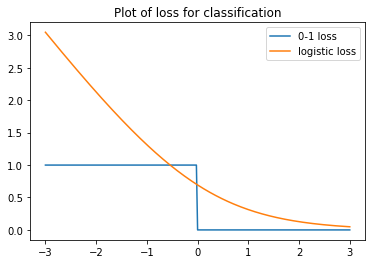

In [26]:
#Empirical risk minimization :
#the logistic loss function uses the sigmoid function
def sigmoid(x):
    return (1/(1+np.exp(-x)))

def loss(x):
    return (np.mean(np.log(1+ np.exp(-x))))

#the logistic loss is a smooth approximation of the 0-1 loss
t=np.linspace(-3,3,255).transpose()
plt.clf
plt.plot(t, t<0,label="0-1 loss")
plt.plot(t,np.log(1+np.exp(-t)),label="logistic loss")
plt.legend()
plt.title("Plot of loss for classification")
plt.show()

In [27]:
#We compute the objective, the gradient and the constants :
def produit(theta,x,y):
    return (np.dot(x, theta)*y)

def objective(theta,x,y,lbda): #empirical risk
    xyt=produit(theta,x,y)
    return (np.mean(np.log(1+np.exp(-xyt)))+lbda*norm(theta)**2 /2)

def gradient(theta,x,y,lbda):
    xyt=produit(theta,x,y)
    n=x.shape[0]
    aux=1/(1+np.exp(xyt))
    return (-(x.T).dot(y*aux)/n+lbda*theta)

def lip(theta,x,y,lbda): #constant L for the L-smooth objective function
    n=x.shape[0]
    L=norm(X, ord=2)**2/(4*n)+lbda
    return (L)

def strong(theta,x,y,lbda): #objective function lambda-strongly convex
    return(lbda)

average minimal value 1/(L+mu) : 0.061488822693722654 average minimal value 1/L : 0.07908935106597413


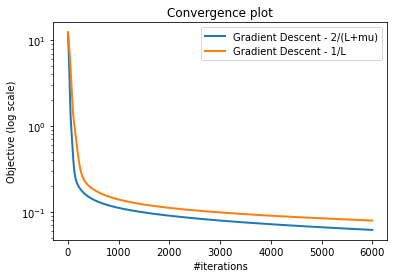

In [28]:
#Gradient Descent :
def gradient_descent(rate,niter,theta,f_objective,f_gradient,x,y):
    objvals=[]
    for i in range(niter):
        f=f_objective(theta,x,y,lbda)
        g=f_gradient(theta,x,y,lbda)
        thetanew=theta-rate*g
        theta=thetanew
        obj=f_objective(theta,x,y,lbda)
        objvals.append(obj)
    return(theta,np.array(objvals))

#Test on our Data Set
#Gradient Descent with the l2 penalization included in the objective :
n=Xbis.shape[0]
theta=np.ones((78,1)) #theta0 (initialisation)
lbda=1/n**(2) #lambda >0
L=lip(theta,Xbis,Ynew,lbda) #1/L~0.04
mu=strong(theta,Xbis,Ynew,lbda) #mu<L

nruns=10
avg_1=0
avg_2=0
for i in range(nruns):
    wgd1,obj_gd1=gradient_descent(2/(L+mu),6000,theta,objective,gradient,Xbis,Ynew) #constant step size < 2/L to have a descent method
    avg_1+=obj_gd1[-1]
    wgd2,obj_gd2=gradient_descent(1/L,6000,theta,objective,gradient,Xbis,Ynew) #usual constant step size for L-smooth functions
    avg_2+=obj_gd2[-1]    
print("average minimal value 1/(L+mu) :",avg_1/nruns,"average minimal value 1/L :",avg_2/nruns)

plt.semilogy(obj_gd1, label="Gradient Descent - 2/(L+mu)", lw=2)
plt.semilogy(obj_gd2, label="Gradient Descent - 1/L", lw=2)
plt.xlabel("#iterations")
plt.ylabel("Objective (log scale)")
plt.title("Convergence plot")
plt.legend()
plt.show()

In [29]:
#Verification that gradient of thetahat (minimizer) is approximately 0 :
wgd2,obj_gd2=gradient_descent(1/L,1000,theta,objective,gradient,Xbis,Ynew)
grad=gradient(wgd2,Xbis,Ynew,lbda)
print(grad)

[[ 8.57301845e-07]
 [-1.89838318e-03]
 [-5.58836790e-03]
 [-1.78356250e-03]
 [ 3.20855833e-03]
 [ 1.34447686e-03]
 [-3.38231912e-03]
 [-2.09809658e-03]
 [ 4.58294576e-03]
 [-8.85470999e-04]
 [ 3.06489185e-03]
 [ 1.13552352e-03]
 [ 1.08037684e-05]
 [-2.25013990e-03]
 [-4.23920732e-04]
 [ 3.33903353e-03]
 [ 2.77444902e-03]
 [-5.70154818e-03]
 [ 4.67565293e-03]
 [ 5.75342745e-03]
 [-5.29396710e-04]
 [ 2.49037338e-03]
 [ 2.66972236e-03]
 [ 6.45505153e-05]
 [ 3.78322629e-03]
 [ 7.86739345e-03]
 [ 1.53320980e-03]
 [-1.32319158e-03]
 [-3.80145675e-03]
 [-8.24585544e-03]
 [ 3.31278370e-03]
 [-9.34317842e-03]
 [-3.30490165e-03]
 [-4.07141206e-04]
 [ 3.65315966e-03]
 [ 8.46450291e-04]
 [ 2.80510697e-03]
 [-2.28241269e-03]
 [ 5.31099610e-03]
 [ 1.36802091e-03]
 [ 4.63504516e-03]
 [ 4.00091622e-04]
 [-6.14560175e-03]
 [ 1.45739111e-03]
 [-1.83694414e-03]
 [ 3.43249756e-03]
 [-7.86221029e-04]
 [ 3.04314345e-03]
 [ 1.16738701e-03]
 [ 5.69716642e-03]
 [ 1.54797104e-04]
 [ 5.47836487e-04]
 [ 2.4000608

average minimal value : 0.07906246325291198


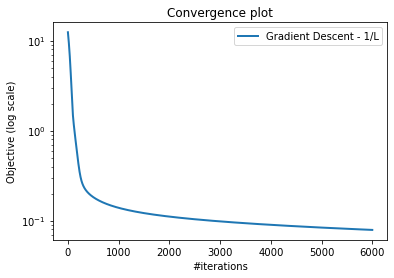

In [30]:
#Gradient Descent without adding l2 penalisation to the objective :
theta=np.ones((78,1)) #initialisation
lbda=0

nruns=10
avg0=0
for i in range(nruns):
    wgd0,obj_gd0=gradient_descent(1/L,6000,theta,objective,gradient,Xbis,Ynew)
    avg0+=obj_gd0[-1]
print("average minimal value :",avg0/nruns)
plt.semilogy(obj_gd0, label="Gradient Descent - 1/L", lw=2)
plt.xlabel("#iterations")
plt.ylabel("Objective (log scale)")
plt.title("Convergence plot")
plt.legend()
plt.show()

In [31]:
#Test of constant step size 1/(L+mu):
theta=np.ones((78,1)) #initialisation
lbda=0.5
nruns=10
avgmu=0
for i in range(nruns):
    wgdmu,obj_gdmu=gradient_descent(1/(L+lbda),1000,theta,objective,gradient,Xbis,Ynew)
    avgmu+=obj_gdmu[-1]
print("average minimal value :",avgmu/nruns)

average minimal value : 0.539001196992257


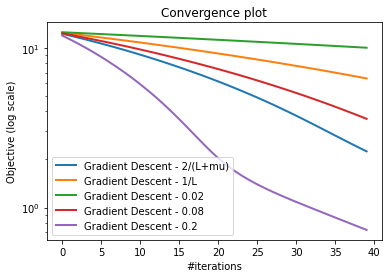

In [32]:
#Test of constant step sizes :
n=Xbis.shape[0]
theta=np.ones((78,1)) #theta0=initialisation
lbda=1/n**(2)
L=lip(theta,Xbis,Ynew,lbda)
mu=strong(theta,Xbis,Ynew,lbda)
avg_1=0
avg_2=0
avg1=0
avg2=0  
avg3=0
        
for i in range(nruns):
    wgd1,obj_gd1=gradient_descent(2/(L+mu),40,theta,objective,gradient,Xbis,Ynew) 
    wgd2,obj_gd2=gradient_descent(1/(L),40,theta,objective,gradient,Xbis,Ynew)
    wgd11,obj_gd11=gradient_descent(0.2,40,theta,objective,gradient,Xbis,Ynew)
    wgd22,obj_gd22=gradient_descent(0.02,40,theta,objective,gradient,Xbis,Ynew)
    wgd33,obj_gd33=gradient_descent(0.08,40,theta,objective,gradient,Xbis,Ynew)

plt.semilogy(obj_gd1, label="Gradient Descent - 2/(L+mu)", lw=2)
plt.semilogy(obj_gd2, label="Gradient Descent - 1/L", lw=2)
plt.semilogy(obj_gd22, label="Gradient Descent - 0.02", lw=2)
plt.semilogy(obj_gd33, label="Gradient Descent - 0.08", lw=2)
plt.semilogy(obj_gd11, label="Gradient Descent - 0.2", lw=2)
plt.xlabel("#iterations")
plt.ylabel("Objective (log scale)")
plt.title("Convergence plot")
plt.legend()
plt.show()

average minimal value : 9.390627704519103


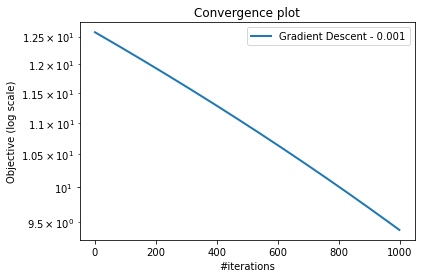

[[ 8.57338085e-07]
 [ 1.96388112e-02]
 [ 2.04681941e-02]
 [ 3.18004520e-01]
 [ 3.24664598e-01]
 [ 3.15516962e-01]
 [ 1.93062861e-01]
 [ 2.23209609e-01]
 [ 1.78960252e-01]
 [ 1.95037813e-01]
 [ 1.23849532e-01]
 [ 5.86528676e-02]
 [ 3.10646703e-01]
 [ 2.44595900e-01]
 [ 2.47243575e-01]
 [ 3.64656469e-01]
 [ 3.46849089e-01]
 [ 3.32228683e-01]
 [ 1.11020496e-01]
 [ 1.25228484e-01]
 [ 3.07031694e-01]
 [ 4.51304486e-02]
 [ 3.02240151e-01]
 [ 1.73934745e-01]
 [ 2.61126649e-01]
 [ 2.48100501e-01]
 [ 1.44451197e-01]
 [ 2.66689534e-01]
 [ 2.89328674e-01]
 [ 2.53002290e-01]
 [ 1.80673850e-01]
 [-2.66385005e-02]
 [ 1.88184110e-01]
 [ 8.41798210e-02]
 [ 3.22050261e-01]
 [ 2.04664508e-01]
 [ 3.24377679e-01]
 [ 1.84069728e-01]
 [ 3.19213924e-01]
 [ 3.43247161e-01]
 [ 2.35606778e-01]
 [ 2.45071452e-01]
 [ 1.52666618e-01]
 [-3.01641709e-02]
 [ 1.08969276e-01]
 [ 1.45962466e-01]
 [ 5.28727867e-02]
 [-8.68469311e-02]
 [ 1.29539967e-01]
 [-1.04698268e-01]
 [ 2.41397628e-01]
 [-9.74810415e-02]
 [ 2.7417066

In [33]:
#Test of a small constant step size :
a1=0
for i in range(nruns):
    w1,o1=gradient_descent(0.001,1000,theta,objective,gradient,Xbis,Ynew) 
    a1+=o1[-1]
print("average minimal value :",a1/nruns)

plt.semilogy(o1, label="Gradient Descent - 0.001", lw=2)
plt.xlabel("#iterations")
plt.ylabel("Objective (log scale)")
plt.legend()
plt.title("Convergence plot")
plt.show()

#gradient of thetahat is farther from 0 after 1000 iterations than it was for the precedent step sizes :
W1,O1=gradient_descent(0.001,1000,theta,objective,gradient,Xbis,Ynew)
print(gradient(W1,Xbis,Ynew,lbda))

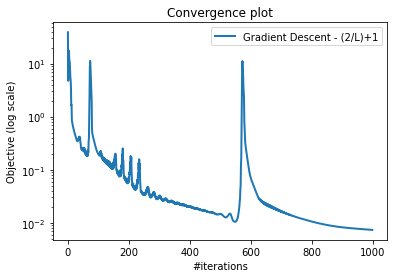

In [34]:
#Test of a large constant step size :
for i in range(nruns):
    W2,O2=gradient_descent((2/L)+20,1000,theta,objective,gradient,Xbis,Ynew) #step size > 2/L

plt.semilogy(O2, label="Gradient Descent - (2/L)+1", lw=2)
plt.xlabel("#iterations")
plt.ylabel("Objective (log scale)")
plt.legend()
plt.title("Convergence plot")
plt.show() #not a descent method anymore

In [35]:
#Test of a decreasing step size :
def gradient_descent_bis(niter,theta,f_objective,f_gradient,x,y):
    n=Xbis.shape[0]
    objvals=[]
    for i in range(niter):
        f=f_objective(theta,x,y,lbda)
        g=f_gradient(theta,x,y,lbda)
        thetanew=theta-(1/(i+1))*g
        theta=thetanew
        obj=f_objective(theta,x,y,lbda)
        objvals.append(obj)
    return(theta,np.array(objvals))

decreasing : 0.8170689123809332 constant 1/L: 0.13917011851018815


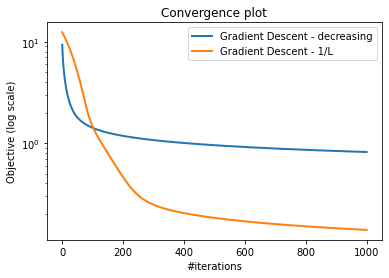

In [36]:
#Test on our data :
avg_2=0
average=0
nruns=10
for i in range(nruns):
    grad,value=gradient_descent_bis(1000,theta,objective,gradient,Xbis,Ynew)
    average+=value[-1]
    wgd2,obj_gd2=gradient_descent(1/(L),1000,theta,objective,gradient,Xbis,Ynew)
    avg_2+=obj_gd2[-1]    
print("decreasing :",average/nruns,"constant 1/L:",avg_2/nruns) #average of minimal values

plt.semilogy(value, label="Gradient Descent - decreasing", lw=2)
plt.semilogy(obj_gd2, label="Gradient Descent - 1/L", lw=2)
plt.xlabel("#iterations")
plt.ylabel("Objective (log scale)")
plt.legend()
plt.title("Convergence plot")
plt.show()

after 200 iterations Nesterov : 1.3733498930399783 GD : 6.432931375806719
after 400 iterations Nesterov : 0.2769136143019635 GD : 0.31160607302743637


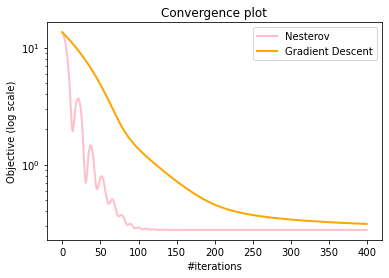

In [37]:
#Accelerated Gradient Descent :
#Nesterov for strongly convex functions (because our objective is strongly convex)
def Nesterov(rate, niter, theta,momentum,f_objective,x,y):
    objvals=[]
    z=theta
    for i in range(niter):
        f=objective(theta,x,y,lbda)
        g=gradient(theta,x,y,lbda)
        thetanew = z - rate* g
        znew= thetanew + momentum*(thetanew-theta)
        theta=thetanew
        z=znew
        obj=f_objective(theta,x,y,lbda)
        objvals.append(obj)          
    return(z, np.array(objvals))

#Test on our data
theta=np.ones((78,1)) #d=78
lbda=1/n**(1/2)
L=lip(theta,Xbis,Ynew,lbda)
mu=strong(theta,Xbis,Ynew,lbda)
beta=(sqrt(L)-sqrt(mu))/(sqrt(L)+sqrt(mu)) #choice of beta for a strongly convex function

nruns=10
avg_=0
avg_2new=0
avgg_=0
avgg_2new=0

for i in range(nruns):
    wgd,obj_gd=Nesterov(1/L,40,theta,beta,objective,Xbis,Ynew)
    avg_+=obj_gd[-1]
    wgd2,obj_gd2=gradient_descent(1/L,40,theta,objective,gradient,Xbis,Ynew)
    avg_2new+=obj_gd2[-1]
print("after 200 iterations Nesterov :",avg_/nruns,"GD :",avg_2new/nruns)  

for i in range(nruns):
    wgdd,obj_gdd=Nesterov(1/L,400,theta,beta,objective,Xbis,Ynew)
    avgg_+=obj_gdd[-1]
    wgd2d,obj_gd2d=gradient_descent(1/L,400,theta,objective,gradient,Xbis,Ynew)
    avgg_2new+=obj_gd2d[-1]
print("after 400 iterations Nesterov :",avgg_/nruns,"GD :",avgg_2new/nruns) 

plt.semilogy(obj_gdd, label="Nesterov", lw=2,color='pink')
plt.semilogy(obj_gd2d, label="Gradient Descent", lw=2,color='orange')
plt.xlabel("#iterations")
plt.ylabel("Objective (log scale)")
plt.legend()
plt.title("Convergence plot")
plt.show()

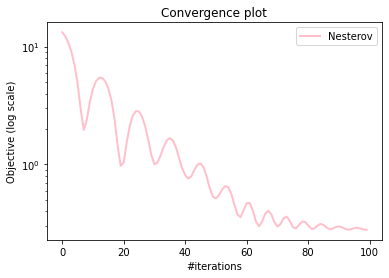

In [38]:
#Nesterov isn't a descent method so the function value can increase at some iterations :
nruns=10
for i in range(nruns):
    wgd,obj_gd=Nesterov(2/L+mu,100,theta,beta,objective,Xbis,Ynew)

plt.semilogy(obj_gd, label="Nesterov", lw=2,color='pink')
plt.xlabel("#iterations")
plt.ylabel("Objective (log scale)")
plt.legend()
plt.title("Convergence plot")
plt.show()

In [39]:
#Stochastic Gradient Descent :
#We compute the partial objective and the gradient components
def produitp(theta, x,y,i):
    return (y[i]*np.dot(x[i], theta))

def objectivep(theta,x,y,lbda,i):
    xyti=produitp(theta,x,y,i)
    return (np.log(1+np.exp(-xyti))+lbda*norm(theta)**2/2)

def gradientp(theta,x,y,lbda,i):
    xyti=produitp(theta,x,y,i)
    aux=1/(1+np.exp(xyti))
    return -(x[i].reshape(78,1))*(y[i]*aux)+lbda*theta

#verification that the full gradient is the average of all partial gradients
n=Xbis.shape[0]
d=Xbis.shape[1]
theta=np.zeros((78,1)) #d=78
lbda=1/n**(0.5)
g=0
for i in range(n):
    g=g+gradientp(theta,Xbis,Ynew,lbda,i)
print(gradient(theta,Xbis,Ynew,lbda),g/n)
print(np.sum(np.equal(gradient(theta,Xbis,Ynew,lbda),g/n))/d)

[[ 0.        ]
 [-0.04449085]
 [-0.08516378]
 [ 0.01939901]
 [ 0.06094305]
 [ 0.08361283]
 [-0.05036746]
 [-0.0168757 ]
 [-0.00940043]
 [-0.09021285]
 [ 0.01949478]
 [ 0.00206687]
 [ 0.00737732]
 [-0.00403731]
 [-0.0366723 ]
 [ 0.09609303]
 [ 0.11598831]
 [ 0.06592862]
 [-0.00684153]
 [-0.06997376]
 [ 0.043838  ]
 [-0.01848661]
 [ 0.02929425]
 [-0.03701158]
 [ 0.02043002]
 [ 0.04561968]
 [-0.01050177]
 [-0.0223206 ]
 [-0.02951023]
 [-0.04161147]
 [-0.01498063]
 [-0.26091388]
 [-0.02142357]
 [-0.02289657]
 [ 0.11344953]
 [ 0.0865201 ]
 [ 0.09035547]
 [-0.0141098 ]
 [ 0.09409748]
 [ 0.09410843]
 [ 0.02264816]
 [ 0.04361638]
 [-0.06964243]
 [-0.08734501]
 [-0.05374751]
 [-0.00862323]
 [-0.0654527 ]
 [-0.13659702]
 [-0.04164026]
 [-0.17122076]
 [ 0.04819858]
 [-0.12171808]
 [-0.03319788]
 [-0.02113352]
 [ 0.06820316]
 [-0.01217176]
 [-0.00845023]
 [-0.13574845]
 [-0.02666504]
 [ 0.12935812]
 [ 0.00489186]
 [ 0.05675527]
 [-0.04959354]
 [ 0.00782316]
 [-0.00788897]
 [ 0.05778468]
 [-0.02009

average minimal value : 0.08534393542971402


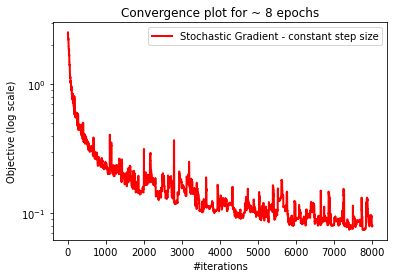

In [40]:
#Stochastic Gradient :
def stochastic(rate,niter,theta,f_objective,x,y):
    objvals=[]
    n=x.shape[0]
    for i in range(niter):
        indice=np.random.randint(0,n,size=1)
        sg=np.zeros(d)
        gradienti=gradientp(theta,x,y,lbda,indice)
        sg=gradienti
        thetanew=theta-rate*sg
        theta=thetanew
        obj=f_objective(theta,x,y,lbda)
        objvals.append(obj)
    return(theta,np.array(objvals))

#Test on our data
theta=randn(78,1) #d=78
n=Xbis.shape[0]
d=Xbis.shape[1]
lbda=1/n**2
L=lip(theta,Xbis,Ynew,lbda)
mu=strong(theta,Xbis,Ynew,lbda)

nruns=10
avg3=0
for i in range(nruns):
    wgd3,obj3=stochastic(1/L,8000,theta,objective,Xbis,Ynew) #constant step size <= 1/L to have convergence
    avg3+=obj3[-1]
print("average minimal value :",avg3/nruns) 

plt.semilogy(obj3, label="Stochastic Gradient - constant step size", lw=2,color='red')
plt.legend()
plt.xlabel("#iterations")
plt.ylabel("Objective (log scale)")
plt.title("Convergence plot for ~ 8 epochs")
plt.show()
#print(gradient(wgd3,Xbis,Ynew,lbda))

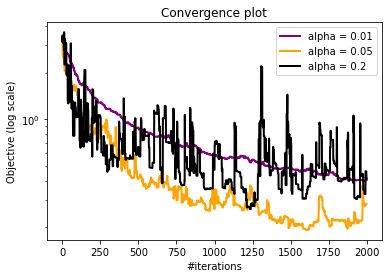

In [41]:
#Test of different constant step sizes :
n=Xbis.shape[0]
d=Xbis.shape[1]
theta=randn(78,1)
lbda=1/n*2
L=lip(theta,Xbis,Ynew,lbda)
mu=strong(theta,Xbis,Ynew,lbda)

nruns=10
for i in range(nruns):
    te1,td1= stochastic(0.01,2000,theta,objective,Xbis,Ynew)
    te2,td2= stochastic(0.05,2000,theta,objective,Xbis,Ynew)
    te3,td3= stochastic(0.2,2000,theta,objective,Xbis,Ynew)
plt.semilogy(td1, label="alpha = 0.01", lw=2,color='purple')
plt.semilogy(td2, label="alpha = 0.05", lw=2,color='orange')
plt.semilogy(td3, label="alpha = 0.2", lw=2,color='black')
plt.legend()
plt.xlabel("#iterations")
plt.ylabel("Objective (log scale)")
plt.title("Convergence plot")
plt.show()

decreasing 1000 ite : 0.43904623463824766 constant 1000 ite : 0.3778423708791986
decreasing 8000 ite : 0.2860723147650358 constant 8000 ite : 0.3517711902973454


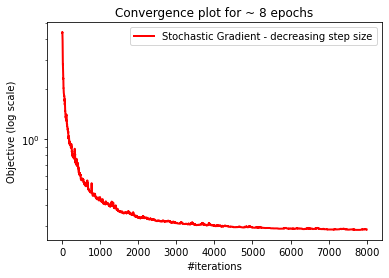

In [42]:
#Stochastic Gradient with decreasing step size :
def stochasticbis(niter,theta,f_objective):
    objvals=[]
    n=Xbis.shape[0]
    for i in range(niter):
        indice = np.random.randint(0,n,size=1)
        sg=np.zeros(d)
        gradienti=gradientp(theta,Xbis,Ynew,lbda,indice)
        sg=gradienti
        rate=float(24/(i+600))
        thetanew=theta-rate*sg
        theta=thetanew
        obj=f_objective(theta,Xbis,Ynew,lbda)
        objvals.append(obj)
    return(theta,np.array(objvals))

theta=randn(78,1)
n=Xbis.shape[0]
d=Xbis.shape[1]
lbda=1/n**(1/2)
L=lip(theta,Xbis,Ynew,lbda)
mu=strong(theta,Xbis,Ynew,lbda)

nruns=10
avg3=0
avg4=0
avg44=0
avg55=0
for i in range(nruns):
    wgd4,obj4= stochasticbis(1000,theta,objective)
    avg4+=obj4[-1]
    wgd3,obj3= stochastic(1/L,1000,theta,objective,Xbis,Ynew)
    avg3+=obj3[-1]
    wgd44,obj44= stochasticbis(8000,theta,objective)
    avg44+=obj44[-1]
    wgd55,obj55= stochastic(1/L,8000,theta,objective,Xbis,Ynew)
    avg55+=obj55[-1]
print("decreasing 1000 ite :",avg4/nruns,"constant 1000 ite :",avg3/nruns) 
print("decreasing 8000 ite :",avg44/nruns,"constant 8000 ite :",avg55/nruns) 
plt.semilogy(obj44, label="Stochastic Gradient - decreasing step size", lw=2,color='red')
plt.legend()
plt.xlabel("#iterations")
plt.ylabel("Objective (log scale)")
plt.title("Convergence plot for ~ 8 epochs")
plt.show()

In [43]:
#Batch Stochastic :
def batch(rate,niter,theta,nb,f_objective,x,y): #nb = Batch size
    objvals=[]
    n=x.shape[0]
    for i in range(niter):
        indice=np.random.choice(n,nb,replace=True)
        sg=np.zeros((d,1))
        for j in range(nb):
            gradienti=gradientp(theta,x,y,lbda,indice[j])
            sg=sg+gradienti
        sg=(1/nb)*sg
        thetanew=theta-rate*sg
        theta=thetanew
        obj=f_objective(theta,x,y,lbda)
        objvals.append(obj)
    return(theta,np.array(objvals))

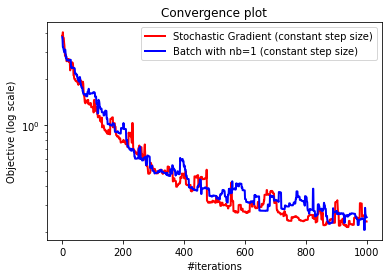

In [44]:
#Stochastic Gradient is a particular case of Batch with nb=1 :
n=Xbis.shape[0]
d=Xbis.shape[1]
theta=randn(78,1) #d=78
lbda=1/n**2
L=lip(theta,Xbis,Ynew,lbda)
mu=strong(theta,Xbis,Ynew,lbda)

avg3=0
avg5=0
nruns=10
for i in range(nruns):
    wgd5,obj5=batch(1/L,1000,theta,1,objective,Xbis,Ynew) 
    avg5+=obj5[-1]
    wgd3,obj3=stochastic(1/L,1000,theta,objective,Xbis,Ynew) 
    avg3+=obj3[-1]
plt.semilogy(obj3, label="Stochastic Gradient (constant step size)", lw=2,color='red')
plt.semilogy(obj5, label="Batch with nb=1 (constant step size)", lw=2,color='blue')
plt.xlabel("#iterations")
plt.ylabel("Objective (log scale)")
plt.legend()
plt.title("Convergence plot")
plt.show()

average minimal value : 0.10368193908358544


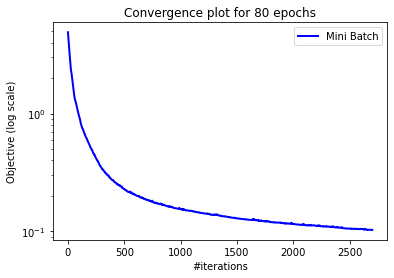

In [45]:
#We test Mini Batch on our data :
theta=randn(78,1) #d=78

nb_epochs=80

nruns=10
avg6=0
for i in range(nruns):
    wgd6,obj6= batch(1/L,int(nb_epochs*(n/32)),theta,32,objective,Xbis,Ynew) #nb=32
    avg6+=obj6[-1]
print("average minimal value :",avg6/nruns) 
plt.semilogy(obj6, label="Mini Batch", lw=2,color='blue')
plt.xlabel("#iterations")
plt.ylabel("Objective (log scale)")
plt.legend()
plt.title("Convergence plot for 80 epochs")
plt.show() #smoother : variance's reduction

nb=n/800 : 0.21539294264529402 nb=n/200 : 0.20630454179816454 nb=n/10 : 0.17373156030623862


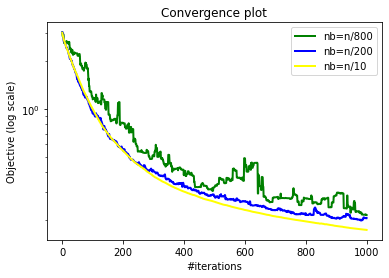

In [47]:
#Mini Batch tests :
theta = randn(78,1) #d=78

m1,n1=batch(1/L,1000,theta,int(n/800),objective,Xbis,Ynew)
m2,n2=batch(1/L,1000,theta,int(n/200),objective,Xbis,Ynew)
m3,n3=batch(1/L,1000,theta,int(n/10),objective,Xbis,Ynew)
m4,n4=stochastic(1/L,1000,theta,objective,Xbis,Ynew)
m5,n5=gradient_descent(1/L,1000,theta,objective,gradient,Xbis,Ynew)
print("nb=n/800 :",n1[-1],"nb=n/200 :",n2[-1],"nb=n/10 :",n3[-1])

plt.semilogy(n1, label="nb=n/800", lw=2,color='green')
plt.semilogy(n2, label="nb=n/200", lw=2,color='blue')
plt.semilogy(n3, label="nb=n/10", lw=2,color='yellow')
plt.xlabel("#iterations")
plt.ylabel("Objective (log scale)")
plt.legend()
plt.title("Convergence plot")
plt.show()

In [48]:
#We compare the different methods :
#Stochastic Gradient and Batch comparison :
n=Xbis.shape[0]
d=Xbis.shape[1]
theta=randn(78,1) #d=78
lbda=1/n**2
L=lip(theta,Xbis,Ynew,lbda)
mu=strong(theta,Xbis,Ynew,lbda)

nruns=10
nb_epochs=60 #use of epochs because iterations don't have the same cost

w_a, obj_a=batch(1/L,int(nb_epochs*n/32),theta,32,objective,Xbis,Ynew) #mini batch
w_b, obj_b=stochastic(1/L,nb_epochs*n,theta,objective,Xbis,Ynew) #stochastic gradient
print("average minimal value Mini Batch :",obj_a[-1],"average minimal value Stochastic :",obj_b[-1])

average minimal value Mini Batch : 0.1166666389943035 average minimal value Stochastic : 0.03204466561138044


In [49]:
#Gradient Descent and Stochastic Gradient comparison :
nb_epochs=60 #use of epochs because iterations don't have the same cost

wgd2,obj_gd2=gradient_descent(1/(L),nb_epochs,theta,objective,gradient,Xbis,Ynew) #gradient descent
w_b,obj_b=stochastic(1/L,nb_epochs*n,theta,objective,Xbis,Ynew) #stochastic gradient
print("average minimal value Gradient Descent :",obj_gd2[-1],"average minimal optimal value Stochastic :",obj_b[-1])

average minimal value Gradient Descent : 1.0658222705653084 average minimal optimal value Stochastic : 0.03142741985883386


In [50]:
#We implement some variants of Stochastic Gradient :
#we try two methods of Diagonal Scaling
def RMSprop(rate,niter,theta,nb,f_objective,beta):
    objvals=[]
    n=Xbis.shape[0]
    d=Xbis.shape[1]
    lbda=1/(2*(n **(0.5)))
    v=np.zeros(d)
    thetanew=np.zeros((78,1))
    for i in range(niter):
        indice=np.random.randint(0,n,size=1)
        sg=np.zeros(d)
        gradienti=gradientp(theta,Xbis,Ynew,lbda,indice)
        sg=gradienti
        for j in range (1,d):
            v[0]=0
            v[j]=(1-beta)*v[j-1] + beta*sg[j]*sg[j]
            sg[j]=sg[j]/(np.sqrt(v[j]+muu))
            thetanew[j]=theta[j]-rate*sg[j]
        theta=thetanew
        obj=f_objective(theta,Xbis,Ynew,lbda)
        objvals.append(obj)
    return(theta,np.array(objvals))

def adagrad(rate,niter,theta,nb,f_objective):
    objvals=[]
    n=Xbis.shape[0]
    d=Xbis.shape[1]
    lbda=1/(2*(n**(0.5)))
    v=np.zeros(d)
    thetanew=np.zeros((78,1))
    for i in range(niter):
        indice=np.random.randint(0,n,size=1)
        sg=np.zeros(d)
        gradienti=gradientp(theta,Xbis,Ynew,lbda,indice)
        sg=gradienti
        for j in range (1,d):
            v[0]=0
            v[j]=v[j-1]+sg[j]*sg[j]
            sg[j]=sg[j]/(np.sqrt(v[j]+muu))
            thetanew[j]=theta[j]-rate*sg[j]
        theta=thetanew
        obj=f_objective(theta,Xbis,Ynew,lbda)
        objvals.append(obj)
    return(theta,np.array(objvals))

RMSprop : 0.35656164111350086
Adagrad : 0.47768129061828474
Stochastic : 0.36440005581813584


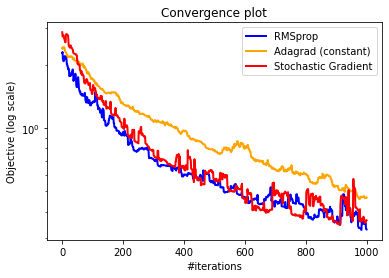

In [51]:
#Test on our data
theta=randn(78,1) #d=78
lbda=1/n**(1/2)
beta=0.8 #beta >0
muu=1/2 #constant >0 to escape division by 0

nruns=10
avg7=0
avg7bis=0
avg3=0
for i in range(nruns):
    wgd7,obj7=RMSprop(1/L,1000,theta,1,objective,beta)
    avg7+=obj7[-1]
    wgd7bis,obj7bis=adagrad(1/L,1000,theta,1,objective)
    avg7bis+=obj7bis[-1]
    wgd3,obj3=stochastic(1/L,1000,theta,objective,Xbis,Ynew)
    avg3+=obj3[-1]

#average minimal values :
print("RMSprop :",avg7/nruns) 
print("Adagrad :",avg7bis/nruns) 
print("Stochastic :",avg3/nruns)

plt.semilogy(obj7, label="RMSprop", lw=2,color='blue')
plt.semilogy(obj7bis, label="Adagrad (constant)", lw=2,color='orange')
plt.semilogy(obj3, label="Stochastic Gradient", lw=2,color='red')
plt.xlabel("#iterations")
plt.ylabel("Objective (log scale)")
plt.legend()
plt.title("Convergence plot")
plt.show()

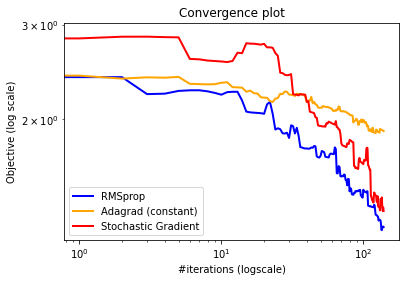

In [52]:
nruns=10
for i in range(nruns):
    wgd7, obj7= RMSprop(1/L,140,theta,1,objective,beta)
    wgd7bis, obj7bis= adagrad(1/L,140,theta,1,objective)
    wgd3, obj3= stochastic(1/L,140,theta,objective,Xbis,Ynew)

plt.semilogy(obj7, label="RMSprop", lw=2,color='blue')
plt.semilogy(obj7bis, label="Adagrad (constant)", lw=2,color='orange')
plt.semilogy(obj3, label="Stochastic Gradient", lw=2,color='red')
plt.xlabel("#iterations (logscale)")
plt.ylabel("Objective (log scale)")
plt.legend()
plt.title("Convergence plot")
plt.semilogx()
plt.show()

In [53]:
#Aggregation method :
def SVRG(rate,niter,theta0,f_objective,x,y,m):
    objvals = []
    n=x.shape[0]
    theta=theta0
    obj=f_objective(theta,x,y,lbda)
    objvals.append(obj)
    for i in range(niter):
        g=gradient(theta,x,y,lbda)
        wtilda=theta
        for j in range(m):
            ind=np.random.choice(n,1,replace=True)
            sg=gradientp(wtilda,x,y,lbda,ind[0])-gradientp(theta,x,y,lbda,ind[0])+g
            wtilda = wtilda-rate*sg             
            if (i+n+j)//n>(i+n)//n:
                objvals.append(obj)
        theta=wtilda
        obj=f_objective(theta,x,y,lbda)
        objvals.append(obj)
    return(theta,np.array(objvals))

average minimal value SVRG : 0.2769136276501757


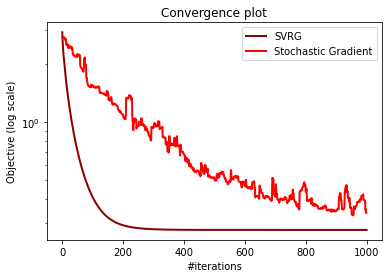

In [54]:
#Test on our data
lbda=1/n**(1/2)

avg7=0
avgs=0
nruns=10
for i in range(nruns):
    wgd7,obj7= SVRG(1/L,1000,theta,objective,Xbis,Ynew,5) #m=5 sub-iterations
    avg7+=obj7[-1]
    wgds,objs=stochastic(1/L,1000,theta,objective,Xbis,Ynew)
    avgs+=objs[-1]
print("average minimal value SVRG :",avg7/nruns) 

plt.semilogy(obj7, label="SVRG", lw=2,color='darkred')
plt.semilogy(objs, label="Stochastic Gradient", lw=2,color='red')
plt.xlabel("#iterations")
plt.ylabel("Objective (log scale)")
plt.legend()
plt.title("Convergence plot")
plt.show()

In [55]:
#Stochastic Gradient and SVRG comparison :
n=Xbis.shape[0]
d=Xbis.shape[1]
theta=randn(78,1) #d=78
lbda=1/n**(1/2)
L=lip(theta,Xbis,Ynew,lbda)
mu=strong(theta,Xbis,Ynew,lbda)

m=5
#use of epochs because iterations of the two methods don't have the same cost
nb_epochs1=40 
nb_epochs2=200

wnew,onew=SVRG(1/L,int(nb_epochs1*(n/(n+2*m))),theta,objective,Xbis,Ynew,m) #SVRG
w_b,obj_b=stochastic(1/L,nb_epochs1*n,theta,objective,Xbis,Ynew) #stochastic gradient
wnewb,onewb=SVRG(1/L,int(nb_epochs2*(n/(n+2*m))),theta,objective,Xbis,Ynew,m) #SVRG
w_btild,obj_btild=stochastic(1/L,nb_epochs2*n,theta,objective,Xbis,Ynew) #stochastic gradient

print("40 epochs SVRG :",onew[-1],"40 epochs Stochastic :",obj_b[-1])
print("200 epochs SVRG :",onewb[-1],"200 epochs Stochastic :",obj_btild[-1])

40 epochs SVRG : 0.7331522432905901 40 epochs Stochastic : 0.331750816439035
200 epochs SVRG : 0.2940436826175592 200 epochs Stochastic : 0.35799995649420224


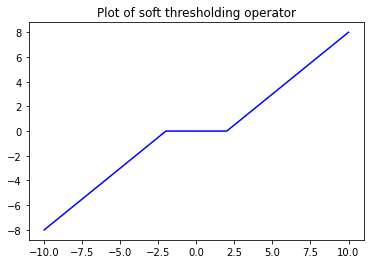

In [57]:
#Test of regularization :
#until now, the minimization was done without regularization (for Gradient Descent) or adding a l2 penalization
#we try a l1 penalization using iterative soft thresholding
def obj(theta,Lambda,x,y):
    p=np.dot(x, theta)*y
    return (np.mean(np.log(1+ np.exp(-p)))+Lambda*np.linalg.norm(theta,1))

def grad(theta,x,y):
    p=np.dot(x,theta)*y
    aux=1/(1+np.exp(p))
    return (-(x.T).dot(y*aux)/n)

#soft thresholding (ISTA)
def soft(x,y):
    return (np.maximum(abs(x)-y, np.zeros(x.shape))*np.sign(x))

t = np.linspace(-10,10,201)
plt.plot(t,soft(t,2),color='blue') #lambda=2
plt.axis('tight')
plt.title("Plot of soft thresholding operator")
plt.show()

0.07171876314217539


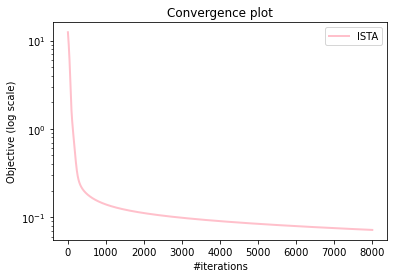

In [58]:
def ISTAstep(theta,Lambda,rate,x,y): 
    return (soft(theta-rate*grad(theta,x,y), Lambda*rate))

def ISTA(rate,niter,theta,f_objective,Lambda,x,y):
    n=Xbis.shape[0]
    objvals=[]
    for i in range(niter):
        f=f_objective(theta,Lambda,x,y)
        thetanew=ISTAstep(theta,Lambda,rate,x,y)
        theta=thetanew
        obj=f_objective(theta,Lambda,x,y)
        objvals.append(obj)
    return(theta,np.array(objvals))

n=Xbis.shape[0]
theta=ones((78,1))
lbda2=1/n**2
L=lip(theta,Xbis,Ynew,lbda)

nruns=10
avg8=0
for i in range(nruns):
    wgd8,obj8=ISTA(1/L,8000,theta,obj,lbda2,Xbis,Ynew) #step size < 2/L
    avg8+=obj8[-1]
#print(gradient(wgd8,Xbis,Ynew,lbda))
print(avg8/nruns) 

plt.semilogy(obj8, label="ISTA", lw=2,color='pink')
plt.xlabel("#iterations")
plt.ylabel("Objective (log scale)")
plt.legend()
plt.title("Convergence plot")
plt.show()

Text(0.5, 1.0, 'Optimal weights for Lasso')

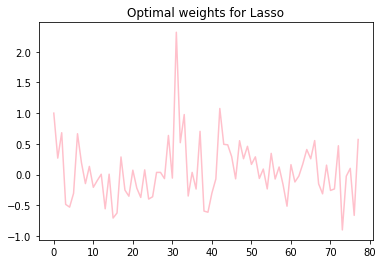

In [59]:
#Weights for Lasso :
lbda=1/n**2
wdg9,obj9=ISTA(1/L,1000,theta,obj,lbda,Xbis,Ynew)
plot(wdg9,color="pink")
plt.title("Optimal weights for Lasso")

In [60]:
#Classification :
p=0.25
n=Xbis.shape[0]
Itrain=int(n*(1-p))
Xtrain=Xbis[:Itrain,]
Xtest=Xbis[Itrain:,]
Ytrain=Ynew[:Itrain]
Ytest=Ynew[Itrain:]

theta=np.ones((78,1)) #d=78
theta2=randn(78,1) #d=78
lbda=0.01
L=lip(theta,Xbis,Ynew,lbda)
mu=strong(theta,Xbis,Ynew,lbda)

def predict(x,th):
    res=x.dot(th)
    res=np.where(res<0,-1,1) #sign
    return(res)

def evaluate(y,ytrue): #evaluate the rate of points well-classified
    return(np.sum(np.equal(y,ytrue))/len(y))

t,value=gradient_descent(1/L,1400,theta,objective,gradient,Xbis,Ynew)    
train=np.dot(Xbis,t)
Yt=np.sign(train)
print("error Gradient Descent train :",mean(Ynew!=Yt))
print("accuracy Gradient Descent train :",evaluate(predict(Xbis,t),Ynew))

t2,value2=gradient_descent(1/L,1400,theta,objective,gradient,Xtrain,Ytrain)    
train2=np.dot(Xtest,t2)
Yt2=np.sign(train2)
print("error Gradient Descent test :",mean(Ytest!=Yt2))
print("accuracy Gradient Descent test :",evaluate(predict(Xtest,t2),Ytest))


t3,value3=stochastic(1/L,1400,theta2,objective,Xbis,Ynew)
train3=np.dot(Xbis,t3)
Yt3=np.sign(train3)
print("error Stochastic train :",mean(Ynew!=Yt3))
print("accuracy Stochastic train :",evaluate(predict(Xbis,t3),Ynew))

t4,value4=stochastic(1/L,1400,theta2,objective,Xtrain,Ytrain)
train4=np.dot(Xtest,t4)
Yt4=np.sign(train4)
print("error Stochastic test :",mean(Ytest!=Yt4))
print("accuracy Stochastic test :",evaluate(predict(Xtest,t4),Ytest))

t5,value4=ISTA(1/L,1400,theta,obj,lbda,Xbis,Ynew)
train5=np.dot(Xbis,t5)
Yt5=np.sign(train5)
print("error ISTA train :",mean(Ynew!=Yt5))
print("accuracy ISTA train :",evaluate(predict(Xbis,t5),Ynew))

t6,value6=ISTA(1/L,1400,theta,obj,lbda,Xtrain,Ytrain)
train6=np.dot(Xtest,t6)
Yt6=np.sign(train6)
print("error ISTA test :",mean(Ytest!=Yt6))
print("accuracy ISTA test :",evaluate(predict(Xtest,t6),Ytest))

error Gradient Descent train : 0.026851851851851852
accuracy Gradient Descent train : 0.9731481481481481
error Gradient Descent test : 0.08148148148148149
accuracy Gradient Descent test : 0.9185185185185185
error Stochastic train : 0.07314814814814814
accuracy Stochastic train : 0.9268518518518518
error Stochastic test : 0.15555555555555556
accuracy Stochastic test : 0.8444444444444444
error ISTA train : 0.05555555555555555
accuracy ISTA train : 0.9444444444444444
error ISTA test : 0.07777777777777778
accuracy ISTA test : 0.9222222222222223
